# Data Preprocessing

In [1]:
import time
start_time = time.time()

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_log_error

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df= pd.read_excel('AS.xlsx')

In [4]:
df.head(3)

,d1(µm),d2(µm),p(µm),tg(µm),na,wl(µm),Amplititude Sensitivity
0,0.6,1.0,2.0,0.03,1.31,0.40,19.098251
1,0.6,1.0,2.0,0.03,1.31,0.41,18.108282
2,0.6,1.0,2.0,0.03,1.31,0.42,8.984620


In [5]:
df.shape

(3623, 7)

In [6]:
for column in df.columns:
    print(column,':',df[column].unique())

d1(µm) : [0.6 1.6 1.4 1.2]
d2(µm) : [1.  0.8 0.6]
p(µm) : [2.  2.5 3. ]
tg(µm) : [0.03 0.04 0.05 0.06]
na : [1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41]
wl(µm) : [0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53
 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67
 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.8
 0.81 0.82 0.83 0.84 0.85 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08
 1.09 1.1  0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.2  1.21 1.22 1.23 1.24 1.25 1.26 1.27 1.28 1.29 1.3  1.31
 1.32 1.33 1.34 1.35 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88
 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 1.01 1.03 1.07 1.09 0.97 0.98
 0.99 1.05 0.78 0.94 0.95 0.97 0.99]
Amplititude Sensitivity  : [19.09825099 18.10828179  8.98461979 ... 95.78316176 95.37763097
 56.94762754]


In [7]:
df.columns

Index(['d1(µm)', 'd2(µm)', 'p(µm)', 'tg(µm)', 'na', 'wl(µm)',
       'Amplititude Sensitivity '],
      dtype='object')

In [8]:
df['Amplititude Sensitivity '].max()

95.78316175613007

In [9]:
data=df

In [10]:
data.columns

Index(['d1(µm)', 'd2(µm)', 'p(µm)', 'tg(µm)', 'na', 'wl(µm)',
       'Amplititude Sensitivity '],
      dtype='object')

In [11]:
data.shape

(3623, 7)

In [12]:
data.loc[data.duplicated(), :]

,d1(µm),d2(µm),p(µm),tg(µm),na,wl(µm),Amplititude Sensitivity


In [13]:
data.isnull().sum().sum()

0

In [14]:
data.isnull().sum()

d1(µm)                      0
d2(µm)                      0
p(µm)                       0
tg(µm)                      0
na                          0
wl(µm)                      0
Amplititude Sensitivity     0
dtype: int64

In [15]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

d1(µm)                      float64
d2(µm)                      float64
p(µm)                       float64
tg(µm)                      float64
na                          float64
wl(µm)                      float64
Amplititude Sensitivity     float64
dtype: object

In [16]:
data.isnull().sum().sum()

0

In [17]:
min_value = data['Amplititude Sensitivity '].min()
max_value = data['Amplititude Sensitivity '].max()
print("Amplititud_Sensitivity min =",min_value)
print("Amplititud_Sensitivity max =",max_value)

Amplititud_Sensitivity min = -1422.3353060554693
Amplititud_Sensitivity max = 95.78316175613007


## Train Test Split

In [18]:
X=data[['d1(µm)', 'd2(µm)', 'p(µm)', 'tg(µm)', 'na', 'wl(µm)']]
Y=data[['Amplititude Sensitivity ']]

In [19]:
# Select 20 random rows from the dataset
random_sample = data.sample(n=10, random_state=42)

# Get the indexes of these rows
random_indexes = random_sample.index
print(random_indexes)

Index([1703, 1417, 1074, 670, 1770, 2529, 184, 787, 32, 840], dtype='int64')


In [20]:
"""Wavelength=data['wl'][random_indexes]
Wavelength"""
Wavelength=data['wl(µm)'][1000:1020]
Wavelength

1000    0.56
1001    0.57
1002    0.58
1003    0.59
1004    0.60
1005    0.61
1006    0.62
1007    0.63
1008    0.64
1009    0.65
1010    0.66
1011    0.67
1012    0.68
1013    0.69
1014    0.70
1015    0.71
1016    0.72
1017    0.73
1018    0.74
1019    0.75
Name: wl(µm), dtype: float64

In [21]:
X_validate=X[1000:1020]
X=X.drop(labels=range(1000, 1020), axis=0)
X_validate.shape

(20, 6)

In [22]:
"""# Select random rows from x and y
X_validate = X.loc[random_indexes]
Y_validate = Y.loc[random_indexes]
X=X.drop(labels=random_indexes, axis=0)
Y=Y.drop(labels=random_indexes, axis=0)
"""


'# Select random rows from x and y\nX_validate = X.loc[random_indexes]\nY_validate = Y.loc[random_indexes]\nX=X.drop(labels=random_indexes, axis=0)\nY=Y.drop(labels=random_indexes, axis=0)\n'

In [23]:
Y_validate=Y[1000:1020]
Y=Y.drop(labels=range(1000, 1020), axis=0)
Y_validate.shape

(20, 1)

In [24]:
X.shape

(3603, 6)

In [25]:
X.head()

,d1(µm),d2(µm),p(µm),tg(µm),na,wl(µm)
0,0.6,1.0,2.0,0.03,1.31,0.40
1,0.6,1.0,2.0,0.03,1.31,0.41
2,0.6,1.0,2.0,0.03,1.31,0.42
3,0.6,1.0,2.0,0.03,1.31,0.43
4,0.6,1.0,2.0,0.03,1.31,0.44


In [26]:
Y.shape

(3603, 1)

In [27]:
Y.head()

,Amplititude Sensitivity
0,19.098251
1,18.108282
2,8.984620
3,0.302080
4,-2.135835


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


# Scalling

In [29]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [30]:
scaler1.fit(X)
scaler2.fit(Y)

x_train = scaler1.transform(X_train)
y_train = scaler2.transform(Y_train)
x_test = scaler1.transform(X_test)
y_test = scaler2.transform(Y_test)

x_validate = scaler1.transform(X_validate)
y_validate = scaler2.transform(Y_validate)
#scaler_datafile=DataFrame(scaler_datafile_1,  columns = data.columns)
#X=scaler_datafile[['d1(um)', 'd2(um)', 'tg(um)', 'na', 'wl']]
#Y=DataFrame(scaler_out_datafile_1,  columns = out_var_datafile_1.columns)


#data for validation with actual data#

In [31]:
y_train

array([[0.91524018],
       [0.95400113],
       [0.91259399],
       ...,
       [0.93132519],
       [0.99338372],
       [0.90842201]])

In [32]:
y_test

array([[0.85569921],
       [0.92981959],
       [0.909556  ],
       [0.6215704 ],
       [0.92222041],
       [0.93841999],
       [0.9643602 ],
       [0.82443514],
       [0.92635747],
       [0.94417285],
       [0.84037471],
       [0.92739147],
       [0.9654726 ],
       [0.93129633],
       [0.94279559],
       [0.98037134],
       [0.94131699],
       [0.92486524],
       [0.89797524],
       [0.97462668],
       [0.97181422],
       [0.9139096 ],
       [0.96070664],
       [0.94152222],
       [0.97922797],
       [0.84145088],
       [0.93974723],
       [0.92995926],
       [0.83599365],
       [0.93768015],
       [0.92386825],
       [0.92280386],
       [0.96246114],
       [0.93978532],
       [0.95932518],
       [0.93968833],
       [0.91636128],
       [0.93832584],
       [0.94316401],
       [0.96232153],
       [0.94130302],
       [0.90991684],
       [0.91127794],
       [0.93163104],
       [0.93744193],
       [0.84918616],
       [0.95507842],
       [0.998

In [33]:
x_train

array([[0.6       , 1.        , 0.        , 0.33333333, 0.4       ,
        0.37894737],
       [0.        , 1.        , 0.        , 0.33333333, 0.        ,
        0.15789474],
       [1.        , 0.5       , 0.        , 0.33333333, 0.        ,
        0.24210526],
       ...,
       [0.        , 1.        , 0.        , 0.66666667, 0.2       ,
        0.42105263],
       [0.        , 1.        , 1.        , 0.66666667, 0.7       ,
        0.33684211],
       [0.        , 1.        , 0.5       , 1.        , 0.3       ,
        0.25263158]])

In [34]:
x_test

array([[0.        , 1.        , 0.5       , 0.33333333, 0.3       ,
        0.23157895],
       [0.6       , 0.5       , 0.        , 0.33333333, 0.2       ,
        0.41052632],
       [1.        , 0.5       , 0.        , 0.33333333, 0.5       ,
        0.42105263],
       ...,
       [0.8       , 0.5       , 0.        , 0.33333333, 0.1       ,
        0.08421053],
       [0.6       , 1.        , 0.        , 0.33333333, 0.2       ,
        0.15789474],
       [0.        , 1.        , 1.        , 0.33333333, 0.1       ,
        0.17894737]])

# **RandomForestRegressor**

In [35]:
modelRF = RandomForestRegressor(n_estimators=30, random_state=67)
modelRF.fit(x_train, y_train)

y_train_pred = modelRF.predict(x_train)
y_test_pred = modelRF.predict(x_test)
#x_train_pred=x_train_pred.reshape(-1,1)
#x_test_pred=x_test_pred.reshape(-1,1)

RF_train_MSE=mean_squared_error(y_train,y_train_pred)
RF_test_MSE=mean_squared_error(y_test,y_test_pred)
RF_train_r2=r2_score(y_train,y_train_pred)
RF_test_r2=r2_score(y_test,y_test_pred)

print('MSE train data: %.7f, MSE test data: %.7f' % (RF_train_MSE,RF_test_MSE))
print('R2 train data: %.7f, R2 test data: %.7f' % (RF_train_r2,RF_test_r2))

MSE train data: 0.0002048, MSE test data: 0.0008489
R2 train data: 0.9722280, R2 test data: 0.8509108


In [36]:
# Reverse scaling the predictions
y_train_actual = scaler2.inverse_transform(y_train)
y_train_pred_actual = scaler2.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_actual = scaler2.inverse_transform(y_test)
y_test_pred_actual = scaler2.inverse_transform(y_test_pred.reshape(-1, 1))

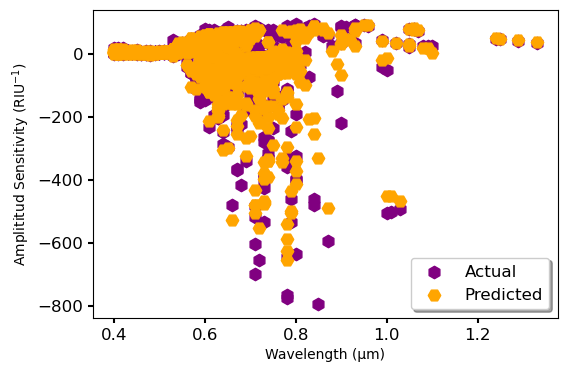

In [37]:
# Plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
plt.xlabel("Wavelength (µm)")
plt.ylabel("Amplititud Sensitivity (RIU$^{-1}$)")
# plt.title("Model Predictions vs Actual Data")

# Use scatter plots with different markers and increased marker size for better visibility
ax.scatter(X_test['wl(µm)'], y_test_actual, label="Actual", color='purple', marker='h', s=80)  # Hexagon marker
ax.scatter(X_test['wl(µm)'], y_test_pred_actual, label="Predicted", color='orange', marker='H', s=80)  # X marker

# Customizing tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=12, width=1.5)
ax.tick_params(axis='both', which='minor', labelsize=12, width=1)
# Customize the legend
ax.legend(fontsize='large', title_fontsize='12', loc='lower right', frameon=True, shadow=True)

plt.show()

# Data Validation

In [38]:
X_validate.head()

,d1(µm),d2(µm),p(µm),tg(µm),na,wl(µm)
1000,1.2,0.8,2.0,0.04,1.33,0.56
1001,1.2,0.8,2.0,0.04,1.33,0.57
1002,1.2,0.8,2.0,0.04,1.33,0.58
1003,1.2,0.8,2.0,0.04,1.33,0.59
1004,1.2,0.8,2.0,0.04,1.33,0.60


In [39]:
Y_validate.head()

,Amplititude Sensitivity
1000,33.979267
1001,41.581166
1002,45.514177
1003,35.469337
1004,-28.055446


# **Performance Comparison after K-fold**

In [40]:
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import KFold

In [41]:
# Define your classifiers
models = {
    'DTR': DecisionTreeRegressor(random_state=42),
    'RFR': RandomForestRegressor(n_estimators=36, random_state=25),
    'KNN': KNeighborsRegressor(n_neighbors = 5),
    'GBR':  GradientBoostingRegressor(n_estimators=56, learning_rate=0.08, max_depth=7, random_state=82),
    'XGBR': XGBRegressor(n_estimators=53, random_state=35, max_depth=7, min_child_weight=3, learning_rate=0.24, reg_lambda=2),
    'BR' : BaggingRegressor(n_estimators=36, random_state=25),
}


In [42]:
pred_Kfold=[]
# Initialize dictionaries to store metrics for each regressor
metrics = {
    name: {'train_mae': [], 'test_mae': [], 'train_mse': [], 'test_mse': [], 'train_r2': [], 'test_r2': [], 'train_time': [], 'test_time': []} for name in models
}
scaler_x.fit(X)
scaler_y.fit(Y)

x = scaler_x.transform(X)
y = scaler_y.transform(Y)

# Set up your k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation for each regressor
for name, model in models.items():
    print(name)
    for train_index, test_index in kfold.split(X):
        start = time.time()
        Xtrain, Xtest = x[train_index], x[test_index]
        Ytrain, Ytest = y[train_index], y[test_index]

        # Train the regressor
        model.fit(Xtrain, Ytrain)
       
        ########
        y_train_pred = model.predict(Xtrain)
        end = time.time()
        train_time=end - start
        print("Train time:",train_time)
        
        start = time.time()
        y_test_pred = model.predict(Xtest)
        end = time.time()
        test_time=end - start
        print("Test time:",test_time)
        
        pred_Kfold.append(y_test_pred)

        # Calculate Performance
        train_MAE = mean_absolute_error(Ytrain,y_train_pred)
        test_MAE = mean_absolute_error(Ytest,y_test_pred)
        train_MSE=mean_squared_error(Ytrain,y_train_pred)
        test_MSE=mean_squared_error(Ytest,y_test_pred)
        train_r2=r2_score(Ytrain,y_train_pred)
        test_r2=r2_score(Ytest,y_test_pred)

        #print('MSE train data: %.7f, MSE test data: %.7f' % (train_MSE,test_MSE))
        #print('R2 train data: %.7f, R2 test data: %.7f' % (train_r2,test_r2))
        
        # Append metrics to the dictionary
        metrics[name]['train_mae'].append(train_MAE)
        metrics[name]['test_mae'].append(test_MAE)    
        metrics[name]['train_mse'].append(train_MSE)
        metrics[name]['test_mse'].append(test_MSE)
        metrics[name]['train_r2'].append(train_r2)
        metrics[name]['test_r2'].append(test_r2)
        metrics[name]['train_time'].append(train_time)
        metrics[name]['test_time'].append(test_time)
# Calculate the mean of metrics across all folds for each regressor
mean_metrics = {name: {metric: np.mean(values) for metric, values in metric_dict.items()} for name, metric_dict in metrics.items()}


DTR
Train time: 0.017960548400878906
Test time: 0.0009887218475341797
Train time: 0.013961315155029297
Test time: 0.0
Train time: 0.012964963912963867
Test time: 0.0009975433349609375
Train time: 0.01396036148071289
Test time: 0.0
Train time: 0.012951850891113281
Test time: 0.0009975433349609375
Train time: 0.013000726699829102
Test time: 0.0
Train time: 0.01197195053100586
Test time: 0.0009951591491699219
Train time: 0.011988639831542969
Test time: 0.0
Train time: 0.012015581130981445
Test time: 0.0
Train time: 0.011980056762695312
Test time: 0.0
RFR
Train time: 0.41185998916625977
Test time: 0.008973360061645508
Train time: 0.4229087829589844
Test time: 0.00891876220703125
Train time: 0.3959827423095703
Test time: 0.00933218002319336
Train time: 0.4358327388763428
Test time: 0.00797891616821289
Train time: 0.4069101810455322
Test time: 0.007978439331054688
Train time: 0.4168829917907715
Test time: 0.007979154586791992
Train time: 0.3899960517883301
Test time: 0.007941007614135742
Tra

In [43]:
result=pd.DataFrame(mean_metrics)
result=result.T
result=result[['train_r2', 'test_r2', 'train_mae', 'test_mae','train_mse', 'test_mse', 'train_time', 'test_time']]
result

,train_r2,test_r2,train_mae,test_mae,train_mse,test_mse,train_time,test_time
DTR,1.000000,0.788216,9.240260e-07,0.010117,1.538135e-09,0.001413,0.013276,0.000398
RFR,0.977498,0.868116,3.528683e-03,0.009230,1.566044e-04,0.000985,0.409017,0.008346
KNN,0.747129,0.500240,1.540207e-02,0.023273,1.758499e-03,0.003449,0.027140,0.002979
GBR,0.917111,0.789826,9.544320e-03,0.014027,5.742790e-04,0.001557,0.263598,0.002290
XGBR,0.949936,0.813183,8.254343e-03,0.013992,3.477054e-04,0.001356,0.205052,0.004587
BR,0.977638,0.867602,3.518350e-03,0.009254,1.556861e-04,0.000988,0.419185,0.009196


In [44]:
pred_Kfold=[]
# Define your classifiers
bestModel = RandomForestRegressor(n_estimators=36, random_state=25)

# Define your classifiers
kfoldModels = {
    '1_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '2_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '3_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '4_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '5_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '6_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '7_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '8_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '9_Fold': RandomForestRegressor(n_estimators=36, random_state=25),
    '10_Fold': RandomForestRegressor(n_estimators=36, random_state=25)
}

# Initialize dictionaries to store metrics for each classifier
kFoldmetrics = {
    name: {'train_mae': [], 'test_mae': [], 'train_mse': [], 'test_mse': [], 'train_r2': [], 'test_r2': []} for name in kfoldModels
}

X_array=x
Y_array=y
# Perform k-fold cross-validation for each classifier
i = 2
for name, k_model in kfoldModels.items():
    if name == '1_Fold':
        # Single train-test split for '1_Fold'
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
        k_model.fit(x_train, y_train)
        
        y_train_pred = k_model.predict(x_train)
        y_test_pred = k_model.predict(x_test)
        y_validate_pred = k_model.predict(x_validate)
        pred_Kfold.append(y_validate_pred)

        # Calculate Performance
        train_MAE = mean_absolute_error(y_train, y_train_pred)
        test_MAE = mean_absolute_error(y_test, y_test_pred)
        train_MSE = mean_squared_error(y_train, y_train_pred)
        test_MSE = mean_squared_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Append metrics to the dictionary
        kFoldmetrics[name]['train_mae'].append(train_MAE)
        kFoldmetrics[name]['test_mae'].append(test_MAE)    
        kFoldmetrics[name]['train_mse'].append(train_MSE)
        kFoldmetrics[name]['test_mse'].append(test_MSE)
        kFoldmetrics[name]['train_r2'].append(train_r2)
        kFoldmetrics[name]['test_r2'].append(test_r2)
        
    else:
        kfold = KFold(n_splits=i, shuffle=True, random_state=42)
        i=i+1
        for train_index, test_index in kfold.split(X_array):
            X_train, X_test = X_array[train_index], X_array[test_index]
            y_train, y_test = Y_array[train_index], Y_array[test_index]

            # Train the classifier
            k_model.fit(X_train, y_train)

            ########
            y_train_pred = k_model.predict(Xtrain)
            y_test_pred = k_model.predict(Xtest)
            y_validate_pred = k_model.predict(x_validate)
            pred_Kfold.append(y_validate_pred)

            # Calculate Performance
            train_MAE = mean_absolute_error(Ytrain,y_train_pred)
            test_MAE = mean_absolute_error(Ytest,y_test_pred)
            train_MSE=mean_squared_error(Ytrain,y_train_pred)
            test_MSE=mean_squared_error(Ytest,y_test_pred)
            train_r2=r2_score(Ytrain,y_train_pred)
            test_r2=r2_score(Ytest,y_test_pred)

            # Append metrics to the dictionary
            kFoldmetrics[name]['train_mae'].append(train_MAE)
            kFoldmetrics[name]['test_mae'].append(test_MAE)    
            kFoldmetrics[name]['train_mse'].append(train_MSE)
            kFoldmetrics[name]['test_mse'].append(test_MSE)
            kFoldmetrics[name]['train_r2'].append(train_r2)
            kFoldmetrics[name]['test_r2'].append(test_r2)

    # Calculate mean of metrics across all folds for each classifier
mean_metrics_kfold = {name: {kFoldmetrics: sum(values) / len(values) for kFoldmetrics, values in kFoldmetrics.items()} for name, kFoldmetrics in kFoldmetrics.items()}


In [45]:
kFoldresult=pd.DataFrame(mean_metrics_kfold)
kFoldresult=kFoldresult.T
kFoldresult

,train_mae,test_mae,train_mse,test_mse,train_r2,test_r2
1_Fold,0.004123,0.011137,0.000214,0.000972,0.970000,0.845297
2_Fold,0.009141,0.012343,0.000989,0.002461,0.847060,0.782683
3_Fold,0.006126,0.008792,0.000435,0.001533,0.932711,0.864612
4_Fold,0.005412,0.007264,0.000377,0.001076,0.941656,0.904929
5_Fold,0.004785,0.006606,0.000278,0.000910,0.956931,0.919616
6_Fold,0.004417,0.006083,0.000249,0.000803,0.961507,0.929109
7_Fold,0.004309,0.006038,0.000231,0.000772,0.964299,0.931853
8_Fold,0.004137,0.005667,0.000216,0.000704,0.966601,0.937821
9_Fold,0.003975,0.005486,0.000195,0.000626,0.969878,0.944679
10_Fold,0.003936,0.005565,0.000191,0.000675,0.970442,0.940401


In [46]:
pred_DT_reshape=pred_Kfold[0].reshape(-1,1)
#pred_DTB_reshape=pred_Kfold[1].reshape(-1,1)
pred_RF_reshape=pred_Kfold[1].reshape(-1,1)
#pred_RFB_reshape=pred_Kfold[3].reshape(-1,1)
pred_XGB_reshape=pred_Kfold[2].reshape(-1,1)
#pred_XGBB_reshape=pred_Kfold[5].reshape(-1,1)
pred_GB_reshape=pred_Kfold[3].reshape(-1,1)
#pred_GBB_reshape=pred_Kfold[7].reshape(-1,1)
pred_B_reshape=pred_Kfold[4].reshape(-1,1)

predDT=scaler2.inverse_transform(pred_DT_reshape)
#predDTB=scaler2.inverse_transform(pred_DTB_reshape)
predRF=scaler2.inverse_transform(pred_RF_reshape)
#predRFB=scaler2.inverse_transform(pred_RFB_reshape)
predXGB=scaler2.inverse_transform(pred_XGB_reshape)
#predXGBB=scaler2.inverse_transform(pred_XGBB_reshape)
predGB=scaler2.inverse_transform(pred_GB_reshape)
#predGBB=scaler2.inverse_transform(pred_GBB_reshape)
predB=scaler2.inverse_transform(pred_B_reshape)
Yvalidate=scaler2.inverse_transform(Y_validate)

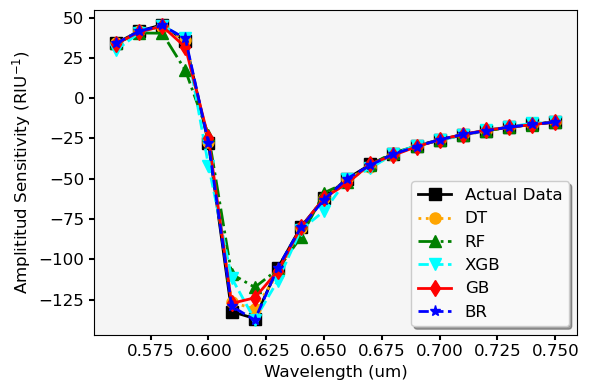

In [47]:
import matplotlib.pyplot as plt

# Create subplots with a larger figure size for better visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

# Labels and titles
ax.set_xlabel("Wavelength (um)", fontsize=12)
ax.set_ylabel("Amplititud Sensitivity (RIU$^{-1}$)", fontsize=12)
#ax.set_title("Model Predictions vs Actual Data", fontsize=18, fontweight='bold')

# Plot actual data with a solid line and square markers
ax.plot(Wavelength, Y_validate, label="Actual Data", color='black', linewidth=2, marker='s', linestyle='-', markersize=8)

# Plot predictions with customized line styles and markers
if predDT is not None:
    ax.plot(Wavelength, predDT, label='DT', color='orange', linewidth=2, marker='o', linestyle=":", markersize=8)
if predRF is not None:
    ax.plot(Wavelength, predRF, label='RF', color='green', linewidth=2, marker='^', linestyle="-.", markersize=8)
if predXGB is not None:
    ax.plot(Wavelength, predXGB, label='XGB', color='cyan', linewidth=2, marker='v', linestyle="--", markersize=8)
if predGB is not None:
    ax.plot(Wavelength, predGB, label='GB', color='red', linewidth=2, marker='d', linestyle="-", markersize=8)
if predB is not None:
    ax.plot(Wavelength, predB, label='BR', color='blue', linewidth=2, marker='*', linestyle="--", markersize=8)

# Customizing the legend with a unique style
legend = ax.legend(loc='best', fontsize=12, frameon=True, shadow=True, title_fontsize='12', fancybox=True)
legend.get_frame().set_facecolor('#f9f9f9')

# Adding grid with unique styling
#ax.grid(True, which='both', color='grey', linestyle='--', linewidth=0.5, alpha=0.7)

# Setting the background color of the plot
ax.set_facecolor('#f5f5f5')

# Customizing tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=12, width=1.5)
ax.tick_params(axis='both', which='minor', labelsize=12, width=1)

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Show the plot
plt.show()

In [48]:
Y_validate

,Amplititude Sensitivity
1000,33.979267
1001,41.581166
1002,45.514177
1003,35.469337
1004,-28.055446
1005,-132.421798
1006,-136.715025
1007,-105.334038
1008,-79.823496
1009,-62.196755


In [49]:
predB

array([[  33.95466131],
       [  41.53717158],
       [  45.07721597],
       [  36.99230652],
       [ -27.93820126],
       [-129.10172027],
       [-137.61472911],
       [-105.19352551],
       [ -80.18191941],
       [ -62.97429636],
       [ -49.86588159],
       [ -41.62047374],
       [ -34.63087051],
       [ -30.03596014],
       [ -25.74418237],
       [ -22.55401204],
       [ -20.22502799],
       [ -18.04042633],
       [ -16.2847322 ],
       [ -14.84468388]])

# XAI TEST

In [50]:
#!pip install shap
#!pip install lime
import shap
import lime
import lime.lime_tabular
from IPython.core.display import HTML, display
import matplotlib.pyplot as plt
from PIL import Image
import io
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# SHAP

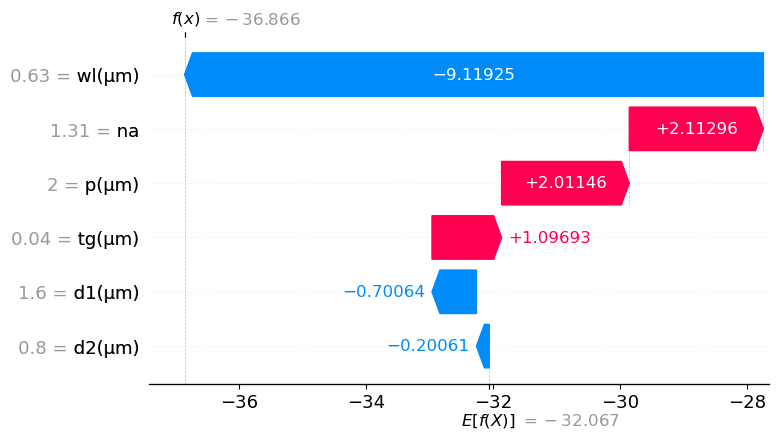

In [51]:
import numpy as np
import pandas as pd
import shap
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 1. Initialize and fit scalers on the original data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X)
scaler_y.fit(Y)

# 2. Scale features and target
X_scaled = scaler_x.transform(X)
Y_scaled = scaler_y.transform(Y).flatten()  # Ensure Y is 1D

# 3. Convert scaled data to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
Y_scaled_df = pd.DataFrame(Y_scaled, columns=Y.columns)

# 4. Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled_df, Y_scaled_df, test_size=0.25, random_state=42
)

# 5. Train the RandomForest model on scaled data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# 6. Calculate SHAP values using the TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)

i=2
# 7. Get the scaled base value and predictions
base_value_scaled = shap_values.base_values[i]
pred_scaled = model.predict(X_train.iloc[i].values.reshape(1, -1))[0]

# 8. Unscale the base value and prediction
base_value_unscaled = scaler_y.inverse_transform([[base_value_scaled]])[0][0]
pred_unscaled = scaler_y.inverse_transform([[pred_scaled]])[0][0]

# 9. Adjust SHAP values to reflect the unscaled output range
shap_values_adjusted = shap_values.values[i] * (
    (pred_unscaled - base_value_unscaled) / shap_values.values[i].sum()
)

# 10. Unscale the input features for interpretability
X_train_unscaled = scaler_x.inverse_transform(X_train)
X_train_unscaled_df = pd.DataFrame(X_train_unscaled, columns=X.columns)

# 11. Generate the waterfall plot with adjusted SHAP values
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_adjusted,  # Adjusted SHAP values
        base_values=base_value_unscaled,  # Unscaled base value
        data=X_train_unscaled_df.iloc[i, :],  # Unscaled input features
    ),
    max_display=10  # Display the top 10 features
)


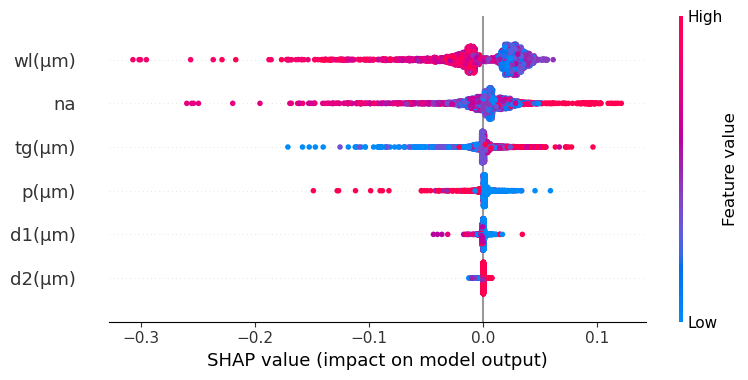

In [52]:
# Visualize the SHAP values for the training data
shap.summary_plot(shap_values, X_train)

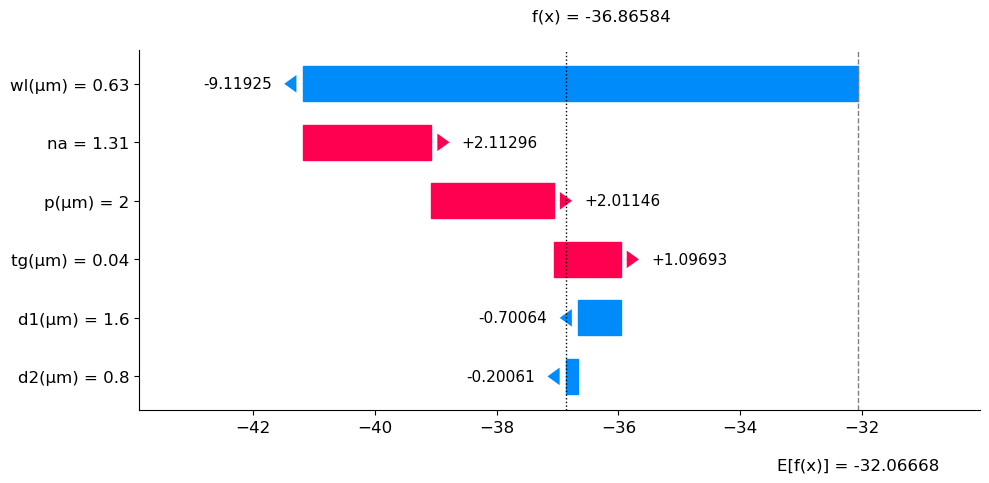

In [53]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample index
i = 2

# === 1. Get scaled SHAP values and base/prediction ===
shap_scaled = shap_values.values[i]
base_scaled = shap_values.base_values[i]
pred_scaled = model.predict(X_train.iloc[i].values.reshape(1, -1))[0]

# === 2. Unscale SHAP values ===
shap_unscaled = scaler_y.inverse_transform(shap_scaled.reshape(-1, 1)).flatten() \
                - scaler_y.inverse_transform(np.zeros_like(shap_scaled).reshape(-1, 1)).flatten()
base_unscaled = scaler_y.inverse_transform([[base_scaled]])[0][0]
pred_unscaled = scaler_y.inverse_transform([[pred_scaled]])[0][0]

# === 3. Unscale input features ===
X_train_unscaled = scaler_x.inverse_transform(X_train)
X_train_unscaled_df = pd.DataFrame(X_train_unscaled, columns=X.columns)
input_unscaled = X_train_unscaled_df.iloc[i, :].values


def shap_waterfall_filled_arrow(values, feature_names, base_value, data, max_display=None):
    # Sort features by absolute SHAP value
    sorted_idx = np.argsort(np.abs(values))[::-1]
    if max_display:
        sorted_idx = sorted_idx[:max_display]
    values = values[sorted_idx]
    features = np.array(feature_names)[sorted_idx]
    feature_values = data[sorted_idx]

    labels = [f"{feat} = {val:.3g}" for feat, val in zip(features, feature_values)]
    f_x = base_value + np.sum(values)

    fig, ax = plt.subplots(figsize=(10, 5))
    positions = np.arange(len(values))

    cumulative = base_value
    for pos, val in zip(positions, values):
        color = '#FF0051' if val > 0 else '#008BFB'
        start = cumulative
        end = cumulative + val

        # Draw filled bar
        ax.barh(pos, val, left=start, color=color, edgecolor=color, height=0.6)

        # Add larger, more prominent arrow tip
        arrow_dir = 3 if val > 0 else -3
        ax.arrow(end, pos, arrow_dir * 0.1, 0,
                 head_width=0.3,              # Larger arrow width
                 head_length=0.2, # Longer arrow head like SHAP
                 fc=color, ec=color,
                 length_includes_head=True,
                 lw=0)

        # Annotate SHAP contribution value
        ax.text(end + (0.5 if val > 0 else -0.5), pos,
                f"{val:+.5f}", va='center', fontsize=11,
                color='black', ha='left' if val > 0 else 'right')

        cumulative = end

    # Base value reference
    ax.axvline(base_value, color='grey', linestyle='--', linewidth=1)
    ax.text(base_value, len(values)+0.6, f"E[f(x)] = {base_value:.5f}",
            color='black', fontsize=12, ha='center')

    # Final prediction reference
    ax.axvline(f_x, color='black', linestyle=':', linewidth=1)
    ax.text(0.55, 1.08, f"f(x) = {f_x:.5f}",
            color='black', fontsize=12, ha='center', transform=ax.transAxes)

    # Formatting
    ax.set_yticks(positions)
    ax.set_yticklabels(labels, fontsize=12)
    ax.invert_yaxis()
    ax.set_xlim(min(base_value, f_x) - 7, max(base_value, f_x) + 2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', labelsize=12)
    ax.set_xlabel("")

    plt.tight_layout()
    plt.show()



# Call updated SHAP-style filled bar with arrow tip
shap_waterfall_filled_arrow(
    values=shap_unscaled,
    feature_names=X.columns,
    base_value=base_unscaled,
    data=input_unscaled,
    max_display=10
)


1
[25.95143446]


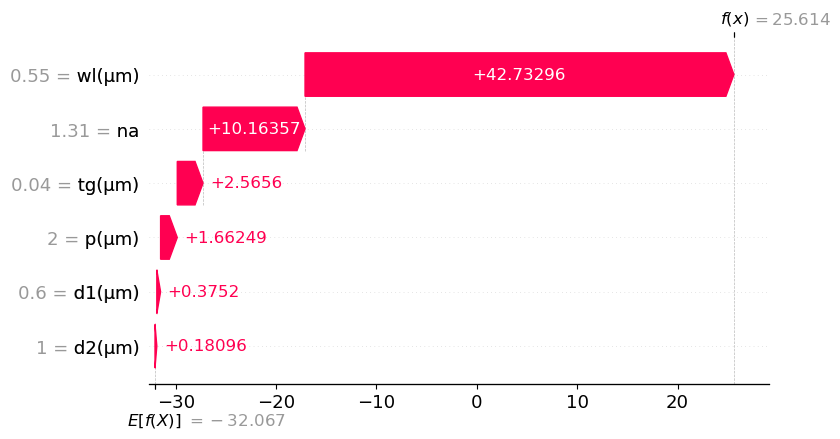

2
[-36.90951222]


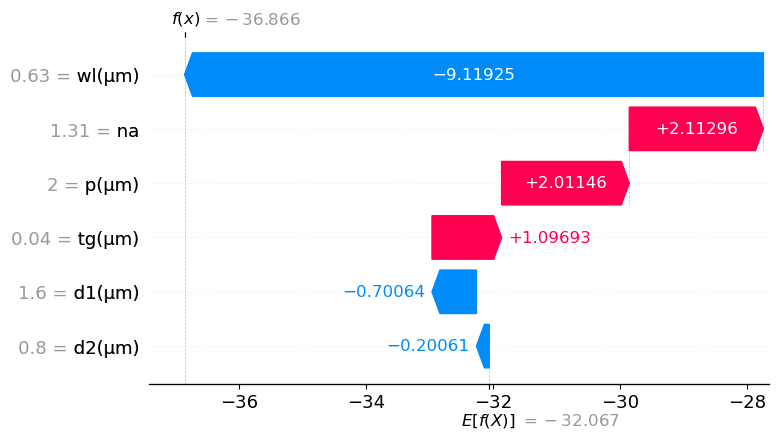

3
[16.9939149]


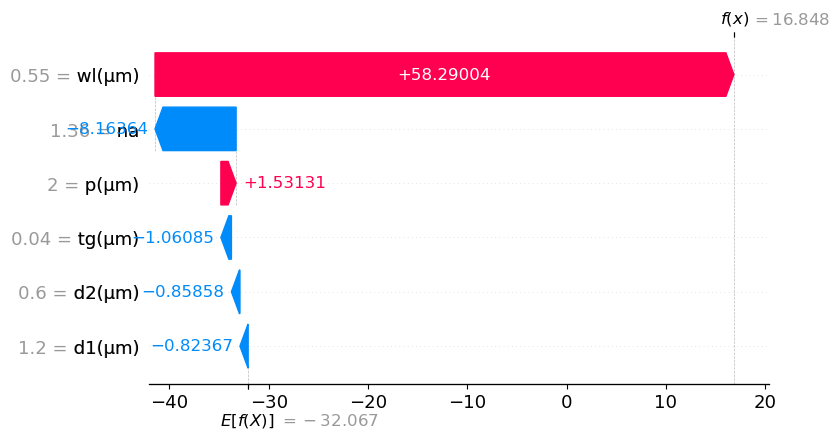

4
[7.87419954]


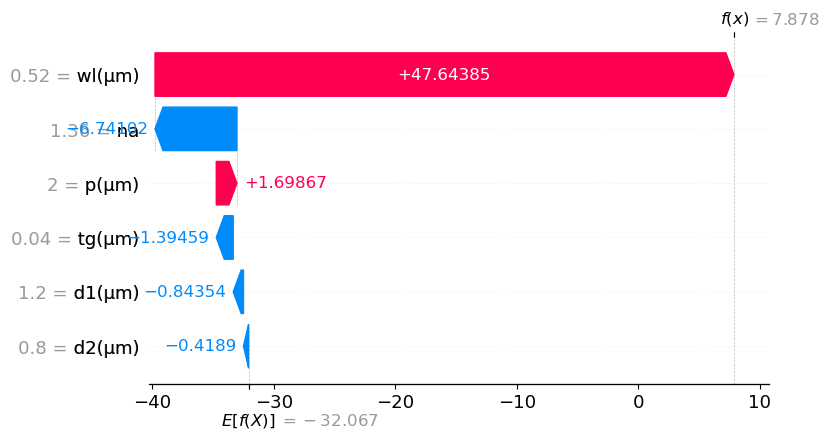

5
[34.45066049]


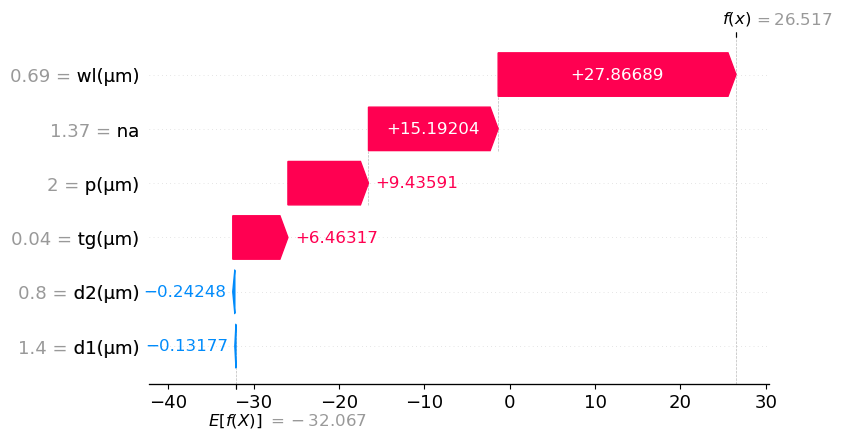

6
[-99.04287254]


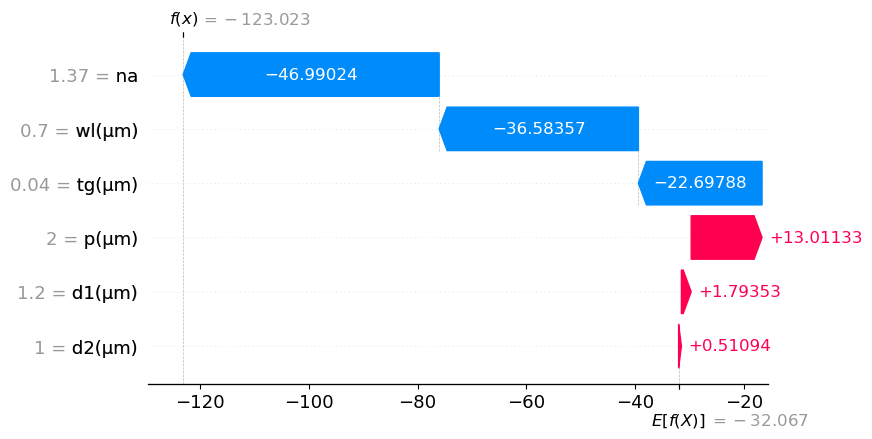

7
[43.14548504]


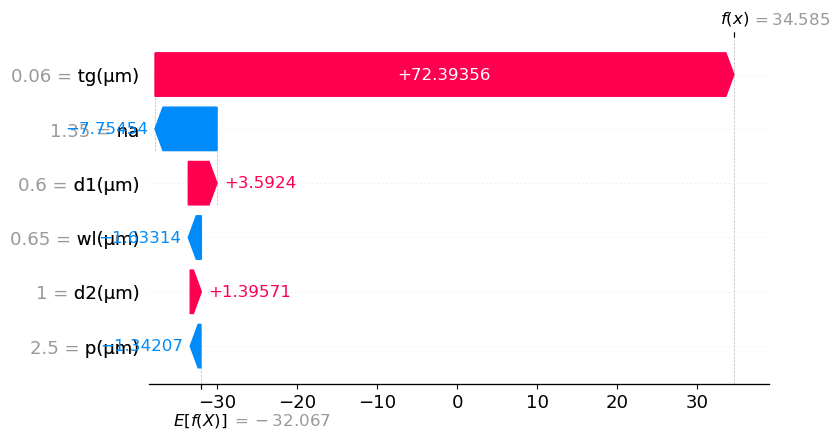

8
[10.65183119]


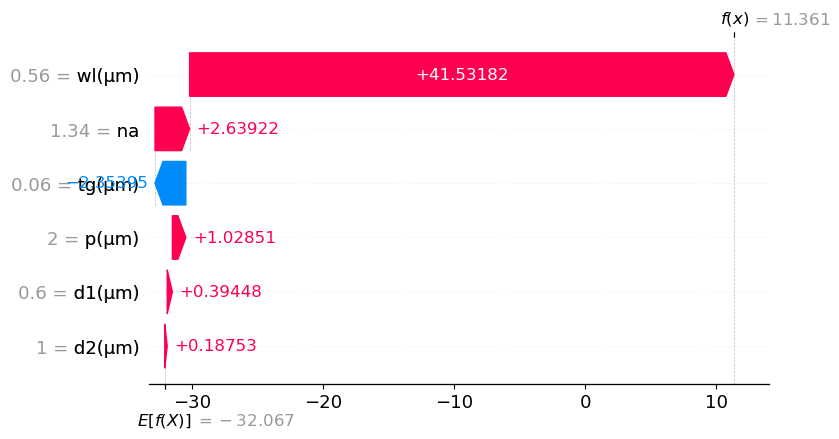

9
[34.84976277]


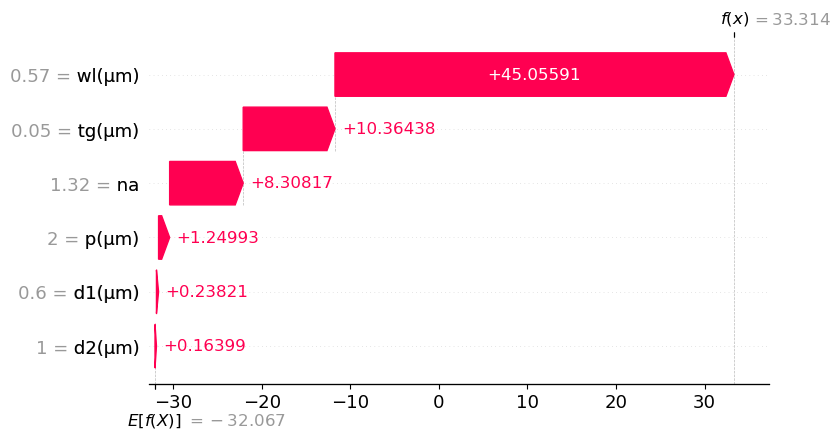

10
[76.56798207]


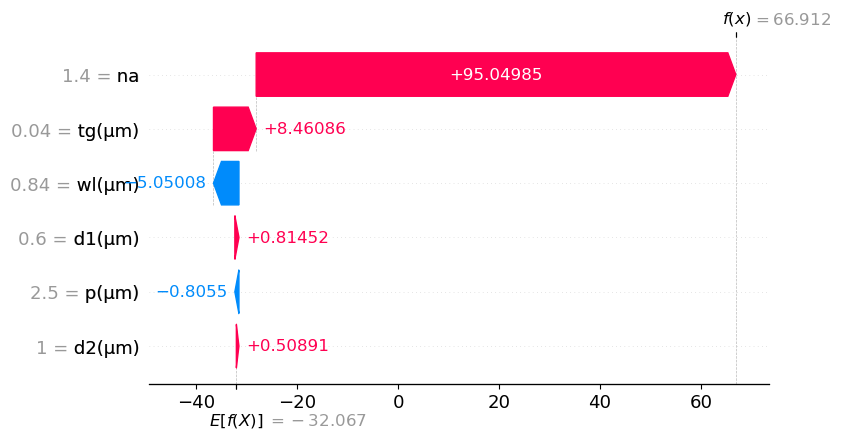

11
[-455.33910547]


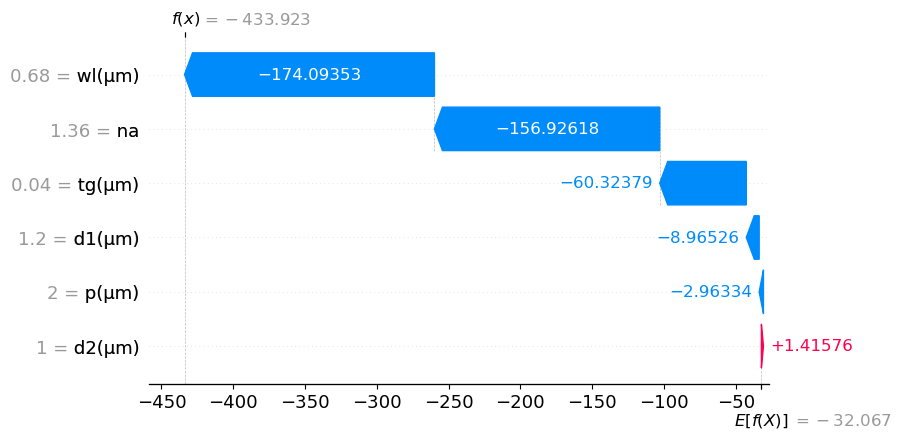

12
[4.65099301]


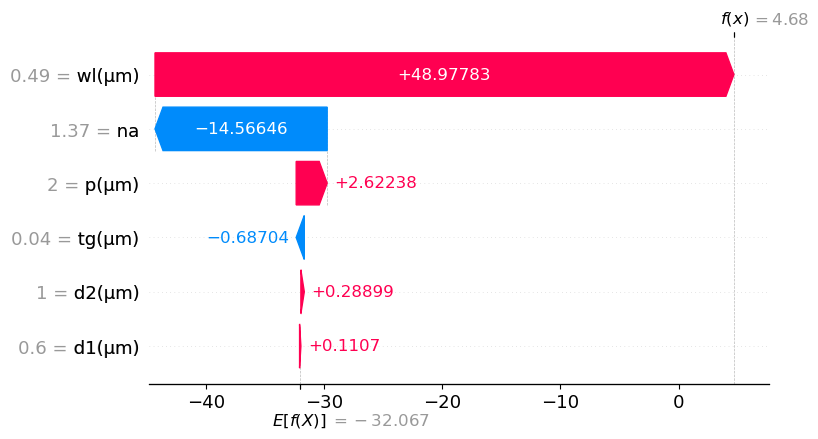

13
[-58.05437252]


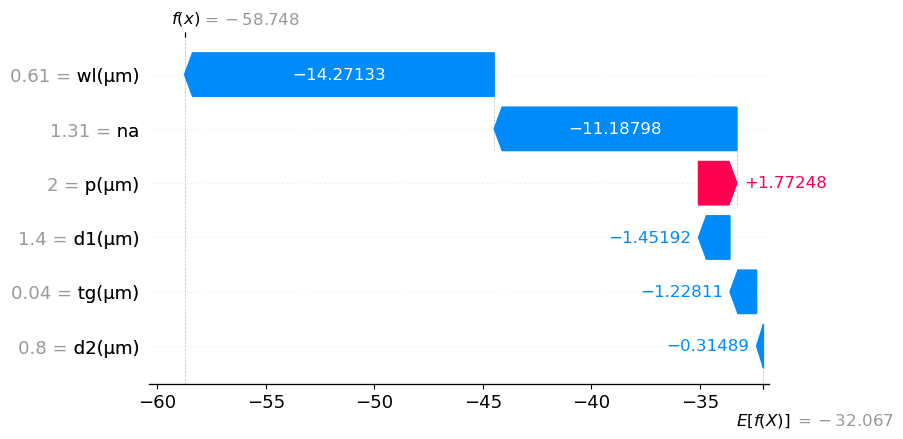

14
[11.66258518]


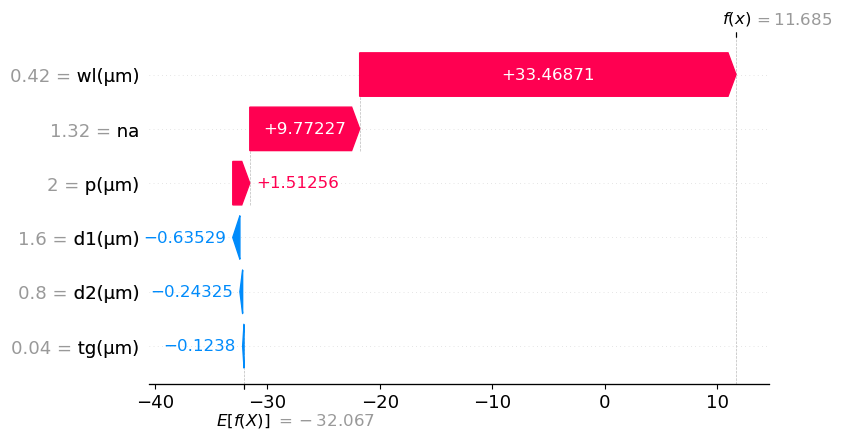

15
[9.37350387]


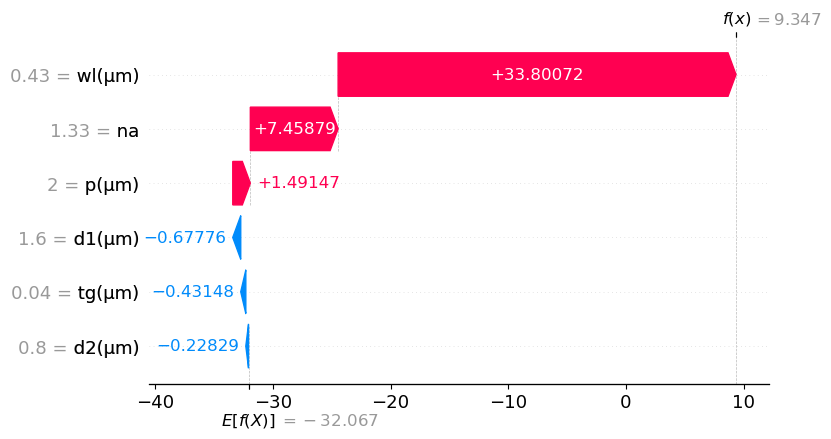

16
[-24.26987069]


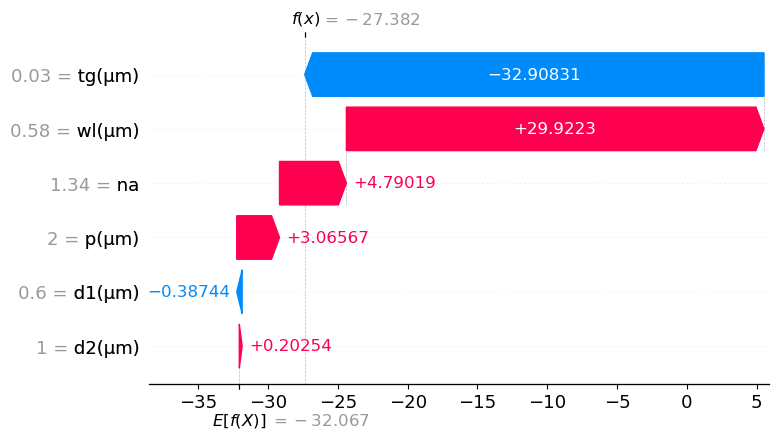

17
[37.45027779]


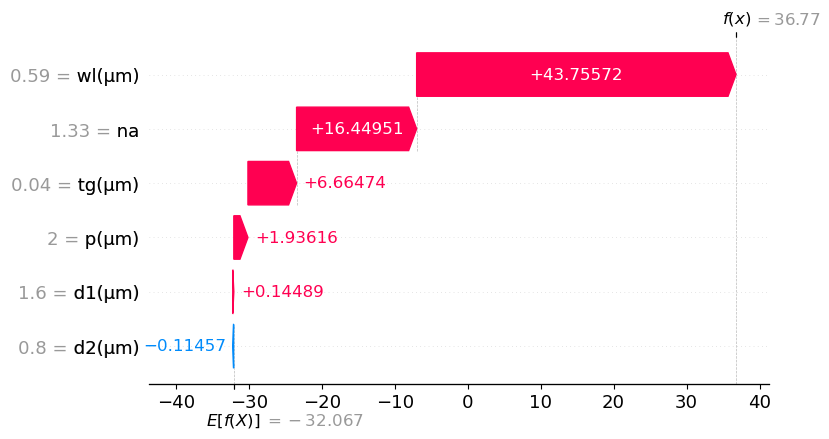

18
[67.03710909]


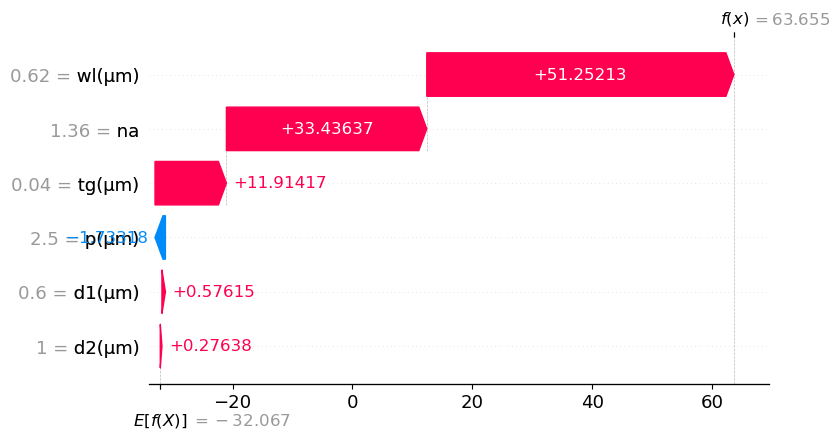

19
[64.36851798]


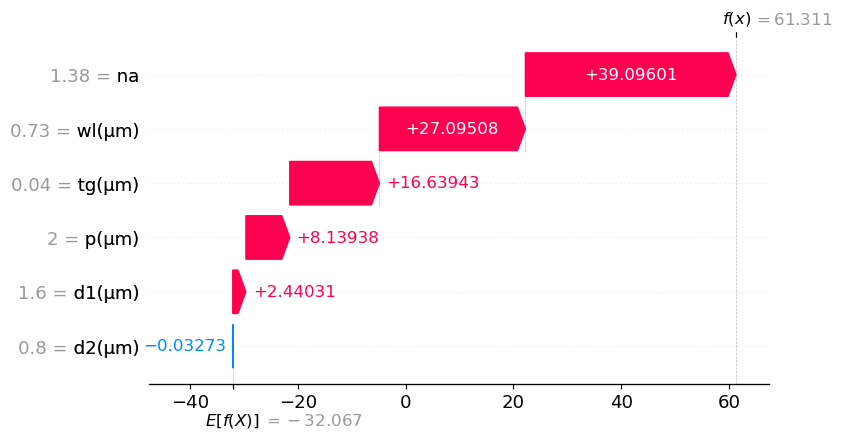

In [54]:
for i in range(1,20):
    # 7. Get the scaled base value and predictions
    base_value_scaled = shap_values.base_values[0]
    pred_scaled = model.predict(X_train.iloc[i].values.reshape(1, -1))[0]

    # 8. Unscale the base value and prediction
    base_value_unscaled = scaler_y.inverse_transform([[base_value_scaled]])[0][0]
    pred_unscaled = scaler_y.inverse_transform([[pred_scaled]])[0][0]

    # 9. Adjust SHAP values to reflect the unscaled output range
    shap_values_adjusted = shap_values.values[i] * (
        (pred_unscaled - base_value_unscaled) / shap_values.values[i].sum()
    )

    # 10. Unscale the input features for interpretability
    X_train_unscaled = scaler_x.inverse_transform(X_train)
    X_train_unscaled_df = pd.DataFrame(X_train_unscaled, columns=X.columns)
    Y_train_unscaled = scaler_y.inverse_transform(Y_train)
    
    print(i)
    print(Y_train_unscaled[i])
    # 11. Generate the waterfall plot with adjusted SHAP values
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values_adjusted,  # Adjusted SHAP values
            base_values=base_value_unscaled,  # Unscaled base value
            data=X_train_unscaled_df.iloc[i, :],  # Unscaled input features
        ),
        max_display=10  # Display the top 10 features
    )
